In [1]:
# 'os' modue provides functions for interacting with the operating system
import os

# 'Numpy' is user for mathematical operations on large, multi dimensional arrats and matrices
import numpy as np

# 'Pandas' is user for data manipulation and analysis
import pandas as pd

# 'Matplotlib'. is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn" is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to supprress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data and setting the unique client_id as the index::
df = pd.read_csv('loans.csv', index_col = 'client_id')

In [3]:
# # showing the first 5 rows of the dataset:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
# To check the Dimensions of the dataset:
df.shape

(443, 7)

In [5]:
#Checking the info of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [ ]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [ ]:
# Loan_id:
df['loan_id'] = df['loan_id'].astype('object')

# repaid:
df['repaid'] = df['repaid'].astype('category')

In [ ]:
# loan_start
df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')

# loan_end:
df['loan_end'] = pd.to_datetime(df['loan_end'], format = '%Y-%m-%d')

In [ ]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [ ]:
# Summary Statistics for Numerical data:
df.describe()

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


In [ ]:
# Summary Statistics for Categorical data:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,430,428
top,home,1.0,10243.0,2007-05-16 00:00:00,2008-08-29 00:00:00
freq,121,237.0,1.0,2,2
first,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
last,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


In [ ]:
# use isnull().sum() to check for missing values
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

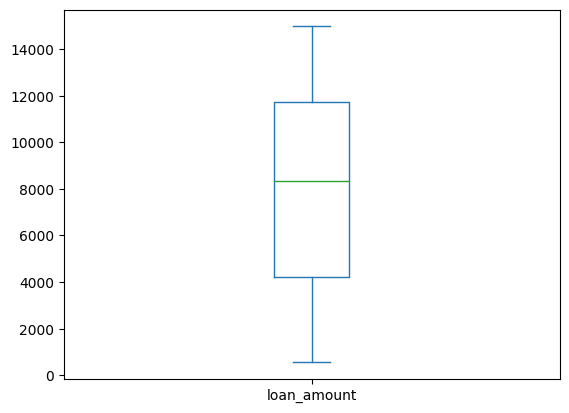

In [ ]:
# For Loan_amount
df['loan_amount'].plot(kind='box')
plt.show()

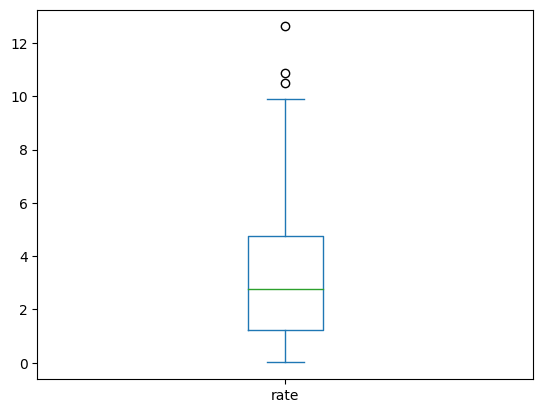

In [ ]:
# For rate
df['rate'].plot(kind='box')
plt.show()

In [ ]:
df['SQRT_RATE'] = df['rate']**0.5

In [ ]:
df['sqrt_rate'] = np.sqrt(df['rate'])

In [ ]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181


In [ ]:
# checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the original data is{}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))

print('')

print("The kurtosis of the original data is {}". format(df.rate.kurt()))
print("The kurtosis of the SQRT tranformed data is {}".format(df.SQRT_RATE.kurt()))

The skewness of the original data is0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862

The kurtosis of the original data is 0.42437165143736433
The kurtosis of the SQRT tranformed data is -0.6318437642052039


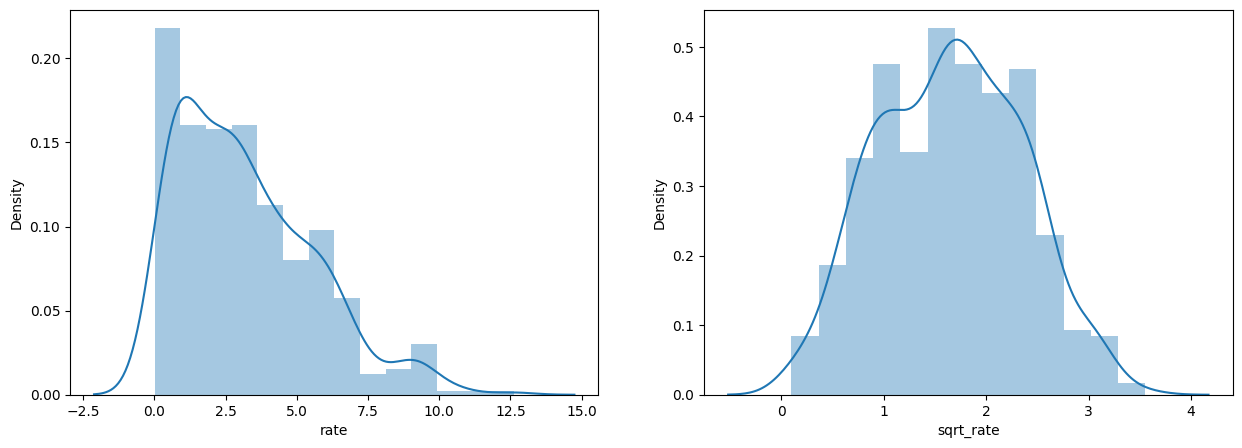

In [ ]:
# plotting the distribution

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])

plt.show()

In [ ]:
df['Log Rate'] = np.log(df['rate'])

In [ ]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033


In [ ]:
print("The skewness of the original data is{}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))
print("The skewnss of the LOG transformed data is{}",format(df['Log Rate'].skew()))

print('')

print("The kurtosis of the original data is {}". format(df.rate.kurt()))
print("The kurtosis of the SQRT tranformed data is {}".format(df.SQRT_RATE.kurt()))
print("The kurtosis of the LOG transformed data is{}",format(df['Log Rate'].kurt()))

The skewness of the original data is0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862
The skewnss of the LOG transformed data is{} -1.5943217626331552

The kurtosis of the original data is 0.42437165143736433
The kurtosis of the SQRT tranformed data is -0.6318437642052039
The kurtosis of the LOG transformed data is{} 4.157026150198228


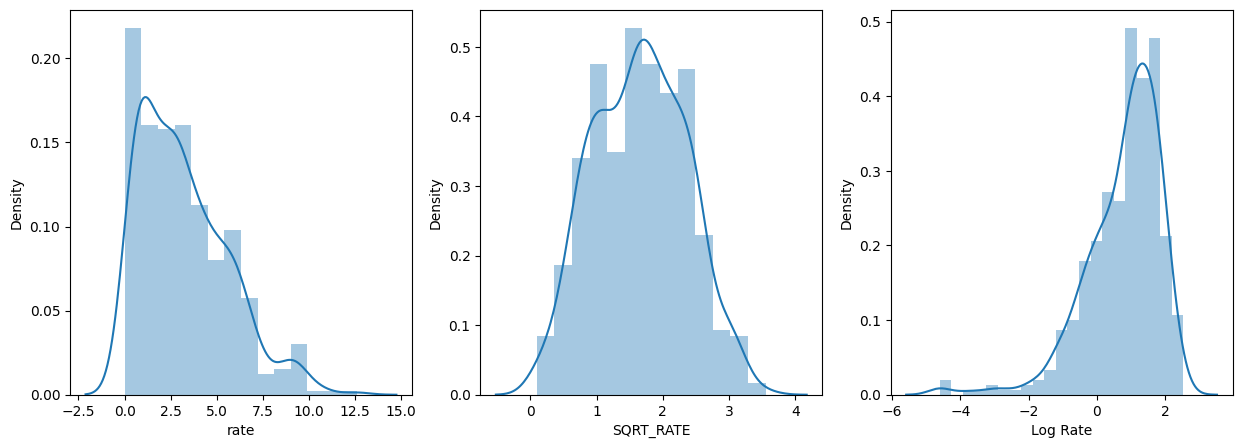

In [ ]:
# plot the graph:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['SQRT_RATE'], ax=axes[1])
sns.distplot(df['Log Rate'], ax=axes[2])

plt.show()

In [ ]:
# Using Lambda function :
df['LOG_Rate'] = df['rate'].apply(lambda x:np.log(x))

In [ ]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate,LOG_Rate
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,1.141033


In [ ]:
# Loading the dataset and setting client id as index

df1 = pd.read_csv('loans.csv', index_col = 'client_id')
df1.head()


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
# loan_id:

df1['loan_id'] = df1['loan_id'].astype('object')

# repaid:

df1['repaid'] = df1['repaid'].astype('category')

In [ ]:
# Loan _start:

df1['loan_start'] = pd.to_datetime(df1['loan_start'], format = '%Y-%m-%d')

#Loan_end:

df1['loan_end'] = pd.to_datetime(df1['loan_end'], format = '%Y-%m-%d')

In [ ]:
import scipy.stats as stats

In [ ]:
df1['ZR'] = stats.zscore(df1['rate'])

In [ ]:
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [ ]:
df1[(df1['ZR']<-3) | (df1['ZR']>3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


In [ ]:
df1[(df1['ZR']<-3) | (df1['ZR']>3)].shape[0]

3

In [ ]:
df2=df1[(df1['ZR']>-3) & (df1['ZR']<3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [ ]:
df1.shape

(443, 8)

In [ ]:
df2.shape

(440, 9)

In [ ]:
df3 = df2.copy()

In [ ]:
df3.drop(columns = ['ZR'], inplace=True)
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
Ql = df3.rate.quantile(0.25)
Q2 = df3.rate.quantile(0.50)
Q3 = df3.rate.quantile(0.75)

#	IQR : Inter-Quartile Range

IQR = Q3 - Ql

#	Lower Limit:

LC = Ql - (1.5*IQR)
#	Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display (UC)


-3.9762499999999994

9.87375

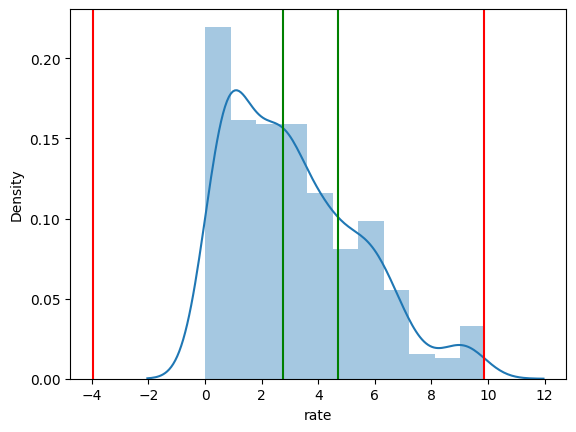

In [ ]:
## Plot
sns.distplot(df3.rate)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q2, color='g')
plt.axvline(Q3, color='g')
plt.show()


In [ ]:
# Find count of Outliers wrt IQR

df3[(df3.rate<LC) | (df3.rate>UC)].reset_index(drop=True)


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,39505,cash,11647,1,11928,2003-07-28,2005-12-24,9.91


In [ ]:
df3[(df3.rate<LC)| (df3.rate>UC)].shape[0]

1

In [ ]:
## Store the clean data wrt IQR:

df4 = df3[(df3.rate>LC) & (df3.rate<UC)]
df4.head()


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
df3.shape

(440, 8)

In [ ]:
df4.shape

(439, 8)

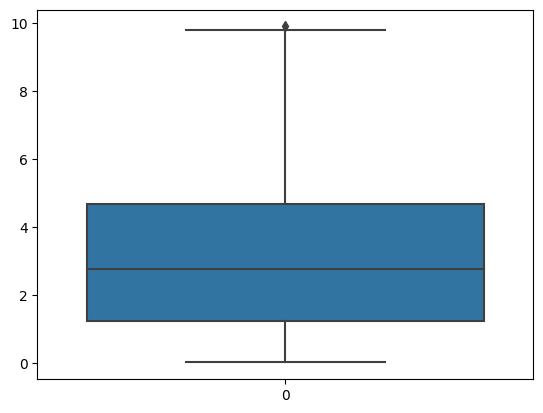

In [ ]:
sns.boxplot(df2.rate)
plt.show()

In [ ]:
# for rate :
avg_rate = df3['rate'].mean()
avg_rate


3.161818181818182

In [ ]:
std_rate = df3['rate'].std()
std_rate

2.3079474188229154

In [ ]:
# step 1 : transform using Z-score
df3['Z_Score_Rate'] = (df3['rate'] - avg_rate)/std_rate

In [ ]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786


In [ ]:
#	checking if the skewness and kurtosis post scaling or not:
#	For Rate:

print("The skewness for the original data is {}.".format(df3.rate.skew()))
print("The kurtosis for the original data is {}.".format(df3.rate.kurt()))

print('')

print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_Rate.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_Rate.kurt()))


The skewness for the original data is 0.7594062707815686.
The kurtosis for the original data is -0.05964248048746912.

The skewness for the Zscore Scaled column is 0.7594062707815691.
The kurtosis for the Zscore Scaled columns is -0.05964248048746823.


In [ ]:
# for Loan_amount:
avg_LA = df3['loan_amount'].mean()
avg_LA

7997.195454545455

In [ ]:
std_LA = df3['loan_amount'].std()
std_LA

4179.435966237437

In [ ]:
#  Step 1 : transform using Z-score
df3['Z_Score_LA'] = (df3['loan_amount'] - avg_LA)/std_LA

In [ ]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786,1.447996


In [ ]:
#	checking if the skewness and kurtosis post scaling or not:
#	For Loan_amount:
print("The skewness for the original data is {}.".format(df3.loan_amount.skew()))
print("The kurtosis for the original data is {}.".format(df3.loan_amount.kurt()))

print('')

print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_LA.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_LA.kurt()))


The skewness for the original data is -0.04678765472024289.
The kurtosis for the original data is -1.2354309429278456.

The skewness for the Zscore Scaled column is -0.04678765472024289.
The kurtosis for the Zscore Scaled columns is -1.2354309429278456.


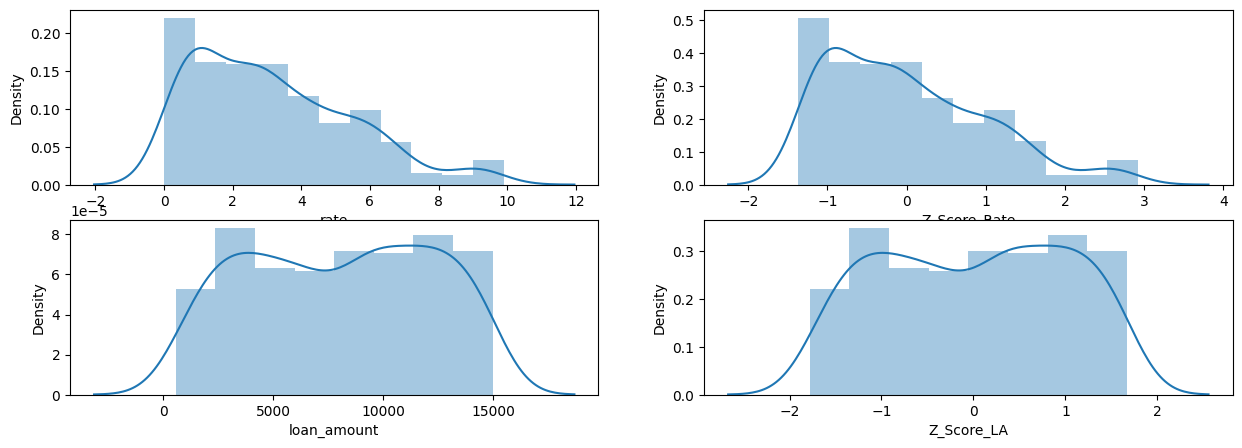

In [ ]:
#	Distribution of the columns
fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0,0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[0,1])
sns.distplot(df3['loan_amount'], ax=axes[1,0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1,1])


plt.show()


In [ ]:
# Loans data:

df4 = df3.copy()
df4.drop(columns = ['Z_Score_Rate'], inplace=True)
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.447996


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df4_num = df[['loan_amount','rate']]
df4_num.head()

,loan_amount,rate
client_id,,
46109,13672,2.15
46109,9794,1.25
46109,12734,0.68
46109,12518,1.24
46109,14049,3.13


In [ ]:
SS = StandardScaler()

scaled_x = SS.fit_transform(df4_num)
scaled_x

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

Manually

In [ ]:
#forrate
min_rate = df4.rate.min()
min_rate

0.01

In [ ]:
max_rate = df4.rate.max()
max_rate

9.91

In [ ]:
df4['Min_Max_R'] = (df4['rate'] - min_rate)/ (max_rate - min_rate)

In [ ]:
#checking if the skewness and kurtosis post scaling or not:
#for Rate:

print("The skewness for the original data is {}.".format(df4.rate.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_Rate.skew()))
print("The skewness for the min max scaled data is {}.".format(df4.Min_Max_R.skew()))

print('')

print("The kurtosis for the original data is {}.".format(df4.rate.kurt()))
print("The kurtosis for the Zscore Scaled column is {}.".format(df3.Z_Score_Rate.kurt()))
print("The kurtosis for the min max scaled data is {}.".format(df4.Min_Max_R.kurt()))

The skewness for the original data is 0.7594062707815686.
The skewness for the Zscore Scaled column is 0.7594062707815691.
The skewness for the min max scaled data is 0.7594062707815686.

The kurtosis for the original data is -0.05964248048746912.
The kurtosis for the Zscore Scaled column is -0.05964248048746823.
The kurtosis for the min max scaled data is -0.05964248048746823.


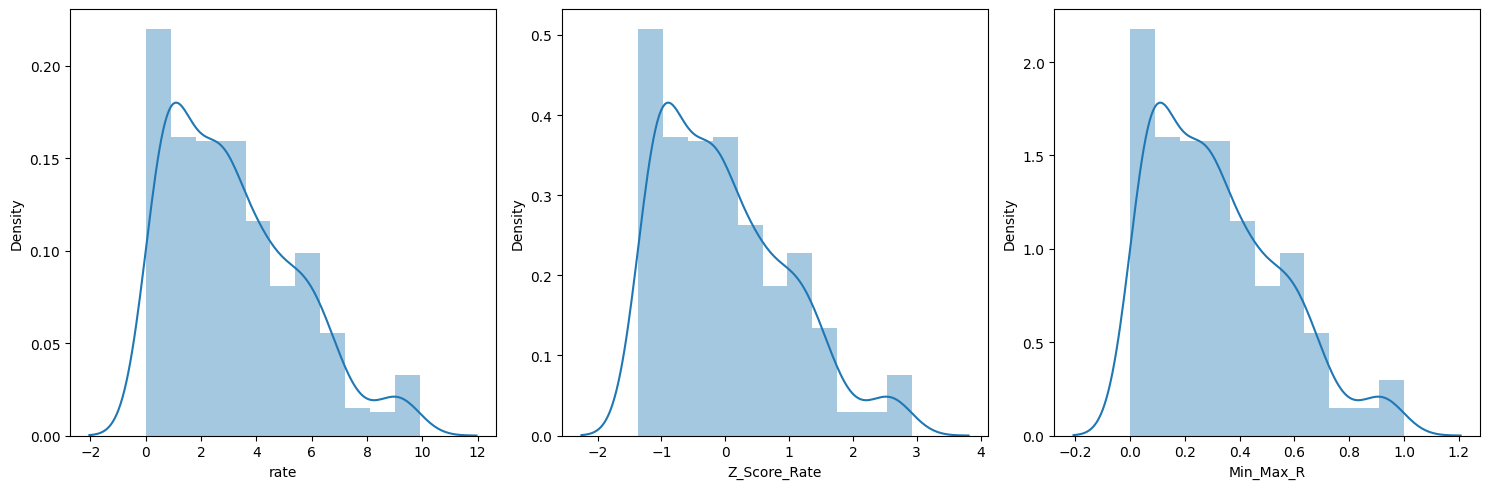

In [ ]:
#distribution of thr column

#for rate

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[1])
sns.distplot(df4['Min_Max_R'], ax=axes[2])

plt.tight_layout()
plt.show()

In [ ]:
#for loan_amount:
min_LA = df4.loan_amount.min()
min_LA

559

In [ ]:
max_LA = df4.loan_amount.max()
max_LA

14971

In [ ]:
df4['Min_Max_LA'] = (df4['loan_amount'] - min_LA)/(max_LA - min_LA)

In [ ]:
#checking if the skewness and kurtosis post scaling or not:
#for Rate:

print("The skewness for the original data is {}.".format(df4.loan_amount.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_LA.skew()))
print("The skewness for the min max scaled data is {}.".format(df4.Min_Max_LA.skew()))

print('')

print("The kurtosis for the original data is {}.".format(df4.loan_amount.kurt()))
print("The kurtosis for the Zscore Scaled column is {}.".format(df3.Z_Score_LA.kurt()))
print("The kurtosis for the min max scaled data is {}.".format(df4.Min_Max_LA.kurt()))

The skewness for the original data is -0.04678765472024289.
The skewness for the Zscore Scaled column is -0.04678765472024289.
The skewness for the min max scaled data is -0.04678765472024256.

The kurtosis for the original data is -1.2354309429278456.
The kurtosis for the Zscore Scaled column is -1.2354309429278456.
The kurtosis for the min max scaled data is -1.2354309429278452.


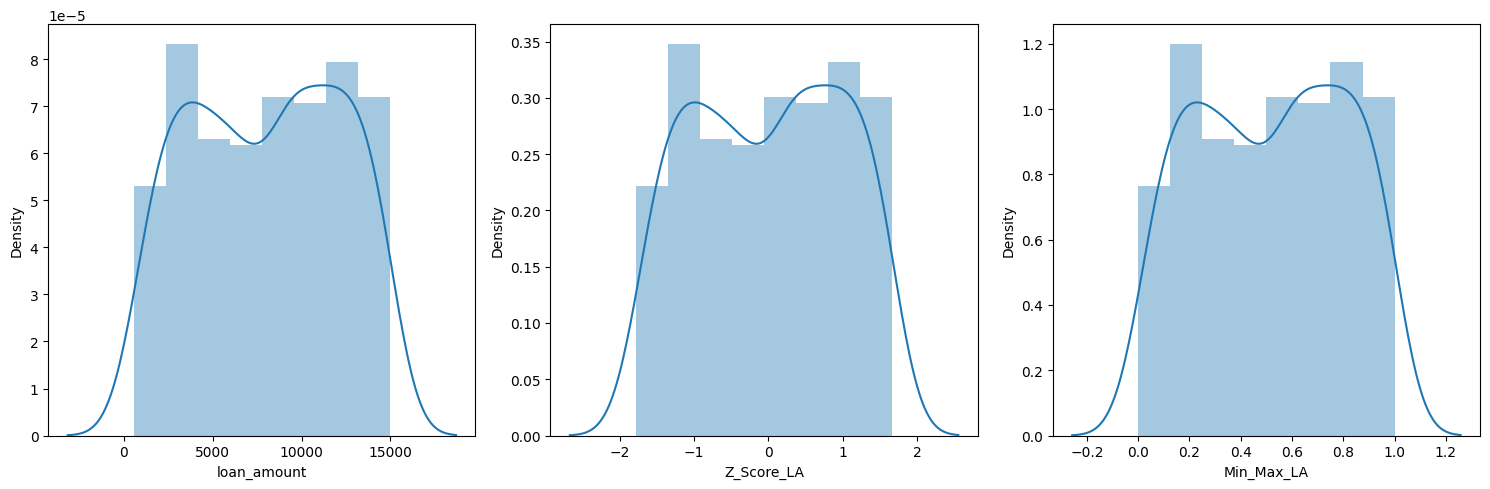

In [ ]:
# Distribution of the columns

#for loan_amount

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['loan_amount'], ax=axes[0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1])
sns.distplot(df4['Min_Max_LA'], ax=axes[2])

plt.tight_layout()
plt.show()

by sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MS = MinMaxScaler()

MinMaxScaled = MS.fit_transform(df4_num)
MinMaxScaled

array([[9.09866778e-01, 1.69706582e-01],
       [6.40785457e-01, 9.83346550e-02],
       [8.44782126e-01, 5.31324346e-02],
       [8.29794616e-01, 9.75416336e-02],
       [9.36025534e-01, 2.47422680e-01],
       [4.42409104e-01, 1.53053132e-01],
       [3.89814044e-01, 7.50991277e-01],
       [8.39369969e-01, 3.27517843e-01],
       [7.28767694e-01, 4.33782712e-01],
       [2.42228698e-01, 3.37034100e-01],
       [7.34804330e-02, 5.13877875e-01],
       [5.44476825e-01, 3.88580492e-02],
       [5.89647516e-01, 6.74068200e-02],
       [2.05731335e-01, 4.73433783e-01],
       [7.14265890e-01, 2.22839017e-01],
       [4.70441299e-01, 1.01506741e-01],
       [7.90591174e-01, 2.60904044e-01],
       [6.59728004e-01, 2.46629659e-01],
       [7.94476825e-01, 6.18556701e-02],
       [0.00000000e+00, 3.28310864e-01],
       [8.63932834e-01, 1.53053132e-01],
       [2.28420760e-01, 6.34417129e-02],
       [5.45378851e-01, 6.50277557e-02],
       [7.79905634e-01, 5.16256939e-01],
       [6.843602

10.Encoding the categorical featurs

there are two ways encode the categorical data into dummyvariables. using:
1.pd.get_dummies\
2.sklearn's in-built function of OneHotEncoder and LAbesEncoder

In [ ]:
#loans data:

df_loans = df3.copy()


In [ ]:
df_loans.drop(columns = ['Z_Score_Rate'], inplace=True)
df_loans.drop(columns = ['Z_Score_LA'], inplace=True)

In [ ]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
df_loans.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [ ]:
#Repaid is also a category columns ans creating dumies for loan_type
df_loans.repaid.head()

0    0
1    0
2    1
3    1
4    1
Name: repaid, dtype: category
Categories (2, int64): [0, 1]

1)pd get_dummieas apporach:

In [ ]:
dummy_cat = pd.get_dummies(df_loans['loan_type'], drop_first = True)
dummy_cat.head()

#drop_first = Trrue drop the first column for each featutre

,credit,home,other
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,0
4,1,0,0


2.OneHot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
OE_tips = OneHotEncoder(drop = 'first').fit(df_loans[['loan_type']])
OE_tips.categories_

[array(['cash', 'credit', 'home', 'other'], dtype=object)]

3.label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()
LE_tips = LE.fit(df_loans[['loan_type']])

In [ ]:
LE_tips.classes_

array(['cash', 'credit', 'home', 'other'], dtype=object)

In [ ]:
#transform any new values to dummy variables via label encoder
LE_tips.transform(['other', 'cash', 'home', 'credit'])

array([3, 0, 2, 1])

In [ ]:
#inverse transform to get original values from the dummy variables:
LE_tips.inverse_transform([1,2,3,0])

array(['credit', 'home', 'other', 'cash'], dtype=object)

11.creating new derived features

In [ ]:
import datetime as dt

In [ ]:
df_loans['loan_tenure'] = df_loans['loan_end'] - df_loans['loan_start']

In [ ]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613 days
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635 days
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519 days
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879 days
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684 days


In [ ]:
df_loans.dtypes

client_id                int64
loan_type               object
loan_amount              int64
repaid                category
loan_id                 object
loan_start      datetime64[ns]
loan_end        datetime64[ns]
rate                   float64
loan_tenure    timedelta64[ns]
dtype: object

In [ ]:
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days
df_loans['loan_tenure']

0      613
1      635
2      519
3      879
4      684
      ... 
435    928
436    511
437    948
438    633
439    638
Name: loan_tenure, Length: 440, dtype: int64

In [ ]:
##tenure in number of years:
df_loans['loan_tenure'] = df_loans['loan_tenure']/365
df_loans["loan_tenure"]

0      1.679452
1      1.739726
2      1.421918
3      2.408219
4      1.873973
         ...   
435    2.542466
436    1.400000
437    2.597260
438    1.734247
439    1.747945
Name: loan_tenure, Length: 440, dtype: float64

trainig and testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
##spliting for x and y variables:

Y = df_loans['loan_amount']
X = df_loans.drop('loan_amount', axis=1)

In [ ]:
#independent variable

X.head()

,client_id,loan_type,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,0,10243,2002-04-16,2003-12-20,2.15,1.679452
1,46109,credit,0,10984,2003-10-21,2005-07-17,1.25,1.739726
2,46109,home,1,10990,2006-02-01,2007-07-05,0.68,1.421918
3,46109,cash,1,10596,2010-12-08,2013-05-05,1.24,2.408219
4,46109,credit,1,11415,2010-07-07,2012-05-21,3.13,1.873973


In [ ]:
#dependen pr target variable

Y.head()

0    13672
1     9794
2    12734
3    12518
4    14049
Name: loan_amount, dtype: int64

In [ ]:
## splitting dataset intp 80% training and 20% testing data:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

#random state ----> is seed -- fixing the sample selection for training & testing dataset

# check the dimention of the train & test subset for

print("the shaape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("the shaape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

the shaape of X_train is: (352, 8)
The shape of X_test is: (88, 8)

the shaape of Y_train is: (352,)
The shape of Y_test is: (88,)


In [ ]:
#median for y_train
median_y_train =Y_train.median()

#median fro t_test
median_y_test = Y_test.median()

In [ ]:
print('the median for Y Train variables is:',median_y_train)

the median for Y Train variables is: 8412.5


In [ ]:
print('the median for Y test variables is:',median_y_test)

the median for Y test variables is: 7673.0
